
# Credit Risk – PD – Probability of Default
This notebook presents the **Exploratory Data Analysis (EDA)** steps for the `credit_risk.xlsx` dataset.

**Objective:** To understand the `default` target variable (0: non-default, 1: default), evaluate data quality, identify potential leakage risks, and summarize initial findings regarding class imbalance.




### 📘 Dataset Description

| **Column**           | **Description** |
|-----------------------|-----------------|
| `id`                 | Unique identifier |
| `member_id`          | Member ID |
| `loan_amnt`          | Loan amount |
| `funded_amnt`        | Funded amount |
| `funded_amnt_inv`    | Amount funded by investors |
| `term`               | Loan term (months) |
| `installment`        | Monthly installment amount |
| `emp_title`          | Job title |
| `emp_length`         | Employment length |
| `annual_inc`         | Annual income |
| `delinq_2yrs`        | Number of delinquencies in the last 2 years |
| `open_acc`           | Number of open accounts |
| `total_acc`          | Total number of accounts |
| `total_pymnt`        | Total payment |
| `total_pymnt_inv`    | Total payment to investors |
| `last_pymnt_amnt`    | Last payment amount |
| `tot_coll_amt`       | Total collection amount |
| `tot_cur_bal`        | Total current balance |
| `total_rev_hi_lim`   | Total revolving credit limit |
| `default`            | Target variable (0: non-default, 1: default) |


In [1]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from utils.missing_outliar_values import print_corr,clean_missing_values
import pandas as pd
from utils.missing_outliar_values import skewness_plot,log_transform
import yaml

from utils.feature_eng import create_features

In [2]:

with open("utils/config.yaml", "r") as f:
    config = yaml.safe_load(f)




In [3]:
#leak_cols
leak_cols = config["leakage"]["leak_cols"]
# mapping
emp_map = config["mappings"]["emp_length"]
#hist_columns
hist_cols = config["eda"]["hist_cols"]
# Stil ayarları
plt.style.use(config["settings"]["style"])
sns.set_context(config["settings"]["context"])
# Pandas ayarları
pd.set_option("display.max_rows", config["pandas"]["max_rows"])
pd.set_option("display.max_columns", config["pandas"]["max_columns"])
# Plot klasörü
PLOT_DIR = config["paths_eda"]["plot_dir"]
os.makedirs(PLOT_DIR, exist_ok=True)

READ_PATH = config["paths_eda"]["read_file"]
WRITE_PATH = config["paths_eda"]["write_eda"]
ENGINE = config["paths_eda"]["data_engine"]

In [4]:
leak_cols

['total_pymnt', 'total_pymnt_inv', 'last_pymnt_amnt', 'id', 'member_id']

In [5]:


df = pd.read_excel(READ_PATH, engine='openpyxl')
df.columns = [c.strip().lower() for c in df.columns]


df.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_title,emp_length,annual_inc,delinq_2yrs,open_acc,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default
0,1,M0000001,16795.0,16505.0,15094.0,36,32.66,Data Scientist,9 years,228362.0,0.0,6.0,12.0,1459.92,1377.66,39.12,191.0,30634.0,13996.0,0
1,2,M0000002,1860.0,1848.0,1494.0,60,2.17,Developer,7 years,273685.0,1.0,14.0,20.0,137.61,133.20,1.74,60.0,158169.0,97196.0,0
2,3,M0000003,39158.0,37619.0,34683.0,36,76.14,Manager,1 year,165933.0,0.0,11.0,17.0,2688.63,2460.36,77.56,65.0,66504.0,31634.0,0
3,4,M0000004,12284.0,12266.0,11096.0,60,14.33,Manager,9 years,136818.0,0.0,7.0,16.0,980.01,907.17,13.45,50.0,101207.0,99850.0,0
4,5,M0000005,7265.0,6953.0,6651.0,60,8.48,Analyst,2 years,114755.0,0.0,13.0,15.0,513.38,508.43,8.86,88.0,108914.0,68794.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                15000 non-null  int64  
 1   member_id         15000 non-null  object 
 2   loan_amnt         14956 non-null  float64
 3   funded_amnt       14860 non-null  float64
 4   funded_amnt_inv   14844 non-null  float64
 5   term              15000 non-null  int64  
 6   installment       14991 non-null  float64
 7   emp_title         14992 non-null  object 
 8   emp_length        15000 non-null  object 
 9   annual_inc        14762 non-null  float64
 10  delinq_2yrs       14985 non-null  float64
 11  open_acc          14986 non-null  float64
 12  total_acc         14970 non-null  float64
 13  total_pymnt       14788 non-null  float64
 14  total_pymnt_inv   14850 non-null  float64
 15  last_pymnt_amnt   14926 non-null  float64
 16  tot_coll_amt      14978 non-null  float6

In [7]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'installment', 'emp_title', 'emp_length', 'annual_inc',
       'delinq_2yrs', 'open_acc', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'default'],
      dtype='object')

In [8]:
df[['default','id','term']]=df[['default','id','term']].astype(object)

In [9]:
df.loc[:, "emp_length_num"] = df["emp_length"].map(emp_map)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_title,emp_length,annual_inc,delinq_2yrs,open_acc,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default,emp_length_num
0,1,M0000001,16795.0,16505.0,15094.0,36,32.66,Data Scientist,9 years,228362.0,0.0,6.0,12.0,1459.92,1377.66,39.12,191.0,30634.0,13996.0,0,9
1,2,M0000002,1860.0,1848.0,1494.0,60,2.17,Developer,7 years,273685.0,1.0,14.0,20.0,137.61,133.20,1.74,60.0,158169.0,97196.0,0,7
2,3,M0000003,39158.0,37619.0,34683.0,36,76.14,Manager,1 year,165933.0,0.0,11.0,17.0,2688.63,2460.36,77.56,65.0,66504.0,31634.0,0,1
3,4,M0000004,12284.0,12266.0,11096.0,60,14.33,Manager,9 years,136818.0,0.0,7.0,16.0,980.01,907.17,13.45,50.0,101207.0,99850.0,0,9
4,5,M0000005,7265.0,6953.0,6651.0,60,8.48,Analyst,2 years,114755.0,0.0,13.0,15.0,513.38,508.43,8.86,88.0,108914.0,68794.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14996,M0014996,9594.0,9554.0,8471.0,36,18.66,Engineer,10+ years,195695.0,0.0,9.0,11.0,758.06,711.39,19.29,157.0,132947.0,50522.0,0,10
14996,14997,M0014997,14418.0,14099.0,12611.0,36,28.04,Data Scientist,9 years,85130.0,0.0,10.0,16.0,946.13,913.53,31.10,11.0,99115.0,62761.0,0,9
14997,14998,M0014998,35854.0,34518.0,34497.0,36,69.72,Consultant,8 years,311044.0,0.0,12.0,16.0,2234.83,2083.88,59.18,27.0,113572.0,77945.0,0,8
14998,14999,M0014999,24108.0,22940.0,19647.0,36,46.88,Data Scientist,10+ years,288933.0,0.0,9.0,13.0,1652.85,1563.08,51.07,60.0,136708.0,24824.0,0,10


In [10]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]



In [11]:
cat_cols

['id', 'member_id', 'term', 'emp_title', 'emp_length', 'default']

## Target Variable Distribution

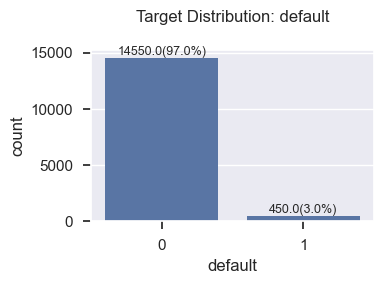

default
0    97.0
1     3.0
Name: proportion, dtype: float64


In [12]:


assert 'default' in df.columns, 'Hedef değişken (default) bulunamadı.'
plt.figure(figsize=(4,3))
ax = sns.countplot(x='default', data=df)
plt.title('Target Distribution: default',pad=20)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height}({height/len(df)*100:.1f}%)", (p.get_x()+p.get_width()/2., height),
                ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, 'target_distribution.png'), dpi=150)
plt.show()

print(df['default'].value_counts(normalize=True).mul(100).round(2))


## 📌 Target Variable: Default Distribution & Class Imbalance Analysis

The distribution of the target variable **default** shows a clear case of **class imbalance** in the dataset.

- **Default = 0 (non-default): 97% → 14,550 records**  
- **Default = 1 (default): 3% → 450 records**

To address this imbalance during model development, techniques such as:

- Oversampling (e.g., SMOTE, ADASYN)  
- Undersampling  
- Class weight adjustments  
- Threshold tuning  

will be applied as they are critical for improving model performance on the minority class.

These methods will also be utilized within this project.


## Histograms

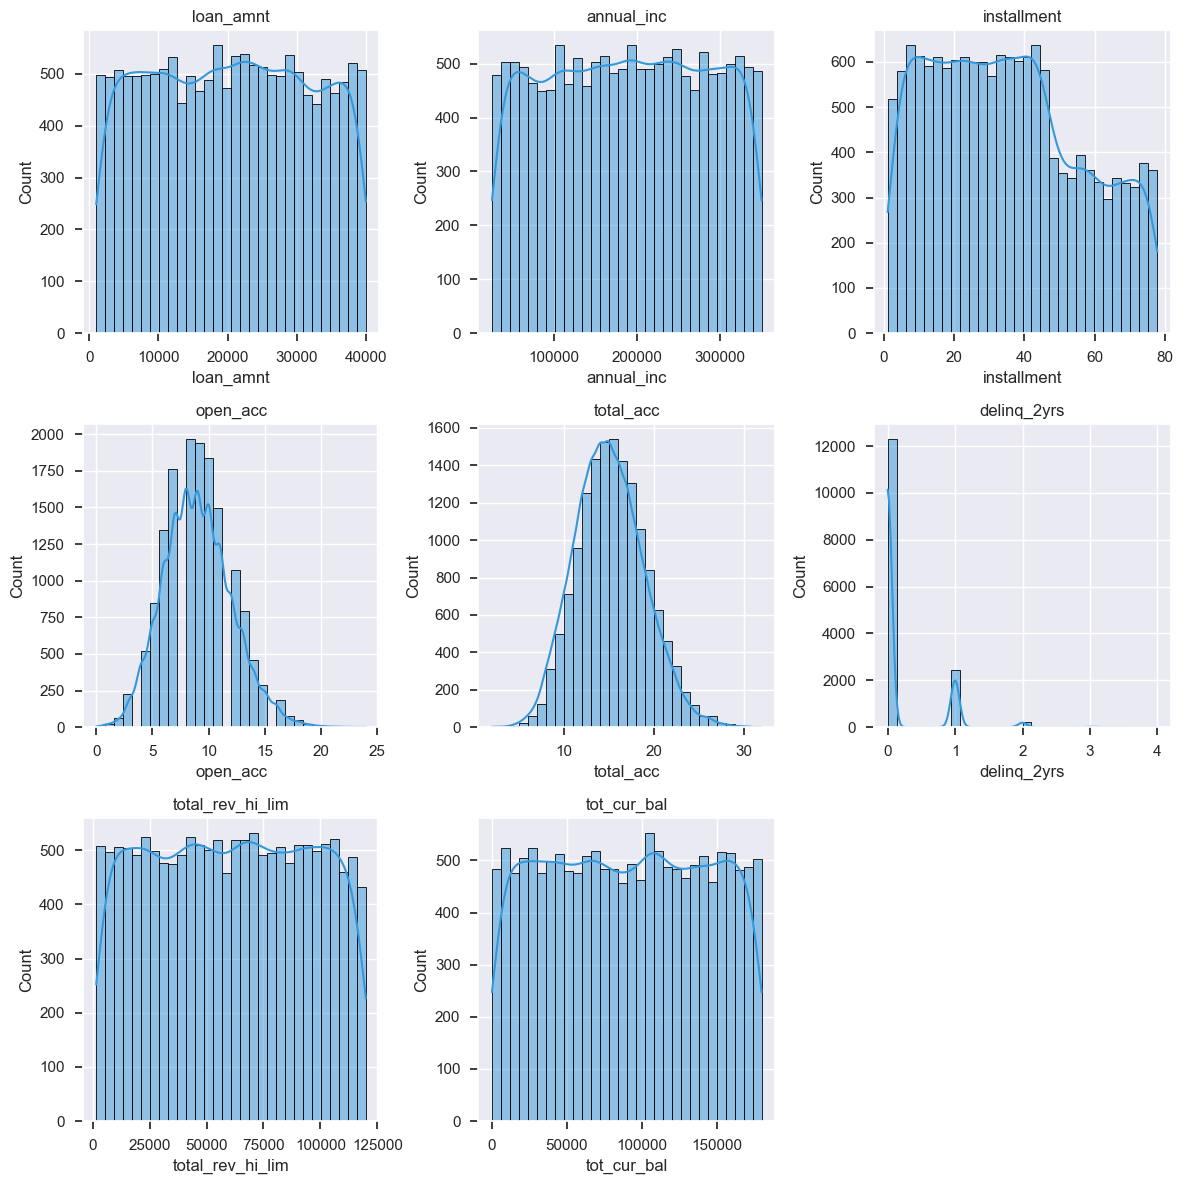

In [13]:
if hist_cols:
    n = len(hist_cols)
    rows = int(np.ceil(n/3))
    plt.figure(figsize=(12, 4*rows))
    for i, c in enumerate(hist_cols, 1):
        plt.subplot(rows, 3, i)
        sns.histplot(df[c].dropna(), bins=30, kde=True, color='#3498db')
        plt.title(c)
    plt.tight_layout()
    #plt.savefig(os.path.join(PLOT_DIR, 'numeric_histograms.png'), dpi=150)
    plt.show()


## Box Plots by Default Breakdown


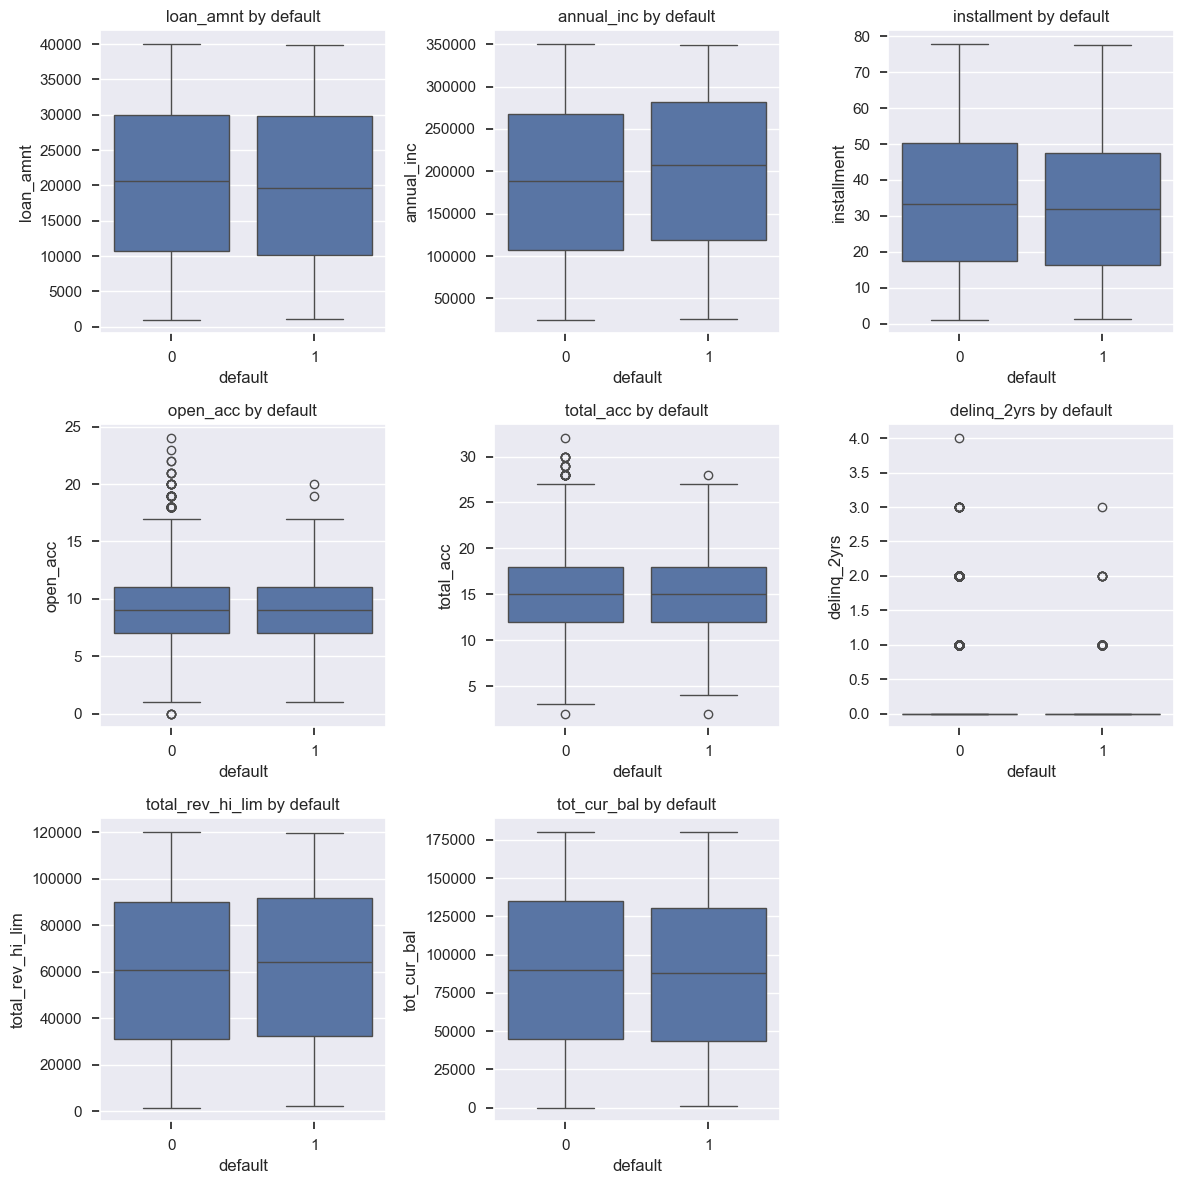

In [14]:
if hist_cols:
    rows = int(np.ceil(len(hist_cols)/3))
    plt.figure(figsize=(12, 4*rows))
    for i, c in enumerate(hist_cols, 1):
        plt.subplot(rows, 3, i)
        sns.boxplot(x='default', y=c, data=df[[c, 'default']].dropna())
        plt.title(f'{c} by default')
    plt.tight_layout()
    plt.show()


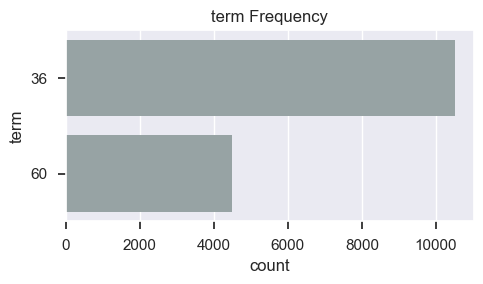

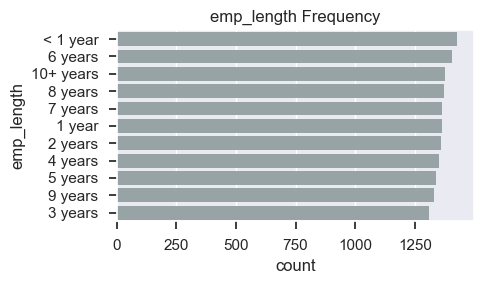

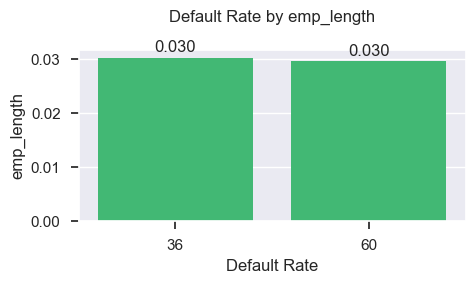

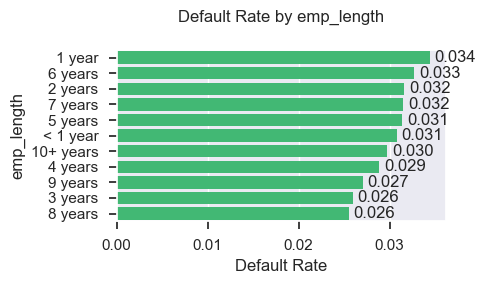

In [15]:
bar_cols = ['term','emp_length']


for c in bar_cols:
    plt.figure(figsize=(5,3))
    order = df[c].value_counts().index
    sns.countplot(y=c, data=df, order=order, color='#95a5a6')
    plt.title(f'{c} Frequency')
    plt.tight_layout()
    plt.savefig(os.path.join(PLOT_DIR, f'{c}_freq.png'), dpi=150)
    plt.show()



tmp = df.groupby('term')['default'].mean().sort_values(ascending=False)

plt.figure(figsize=(5,3))
ax=sns.barplot(x=tmp.index, y=tmp.values, color='#2ecc71')
for i, v in enumerate(tmp.values):
    ax.text(i, v + 0.0005, f"{v:.3f}", ha='center', va='bottom')
plt.title(f'Default Rate by {c}',pad=20)
plt.xlabel('Default Rate')
plt.ylabel(c)
plt.tight_layout()
plt.show()

tmp2 = df.groupby('emp_length')['default'].mean().sort_values(ascending=False)

plt.figure(figsize=(5,3))
ax2=sns.barplot(y=tmp2.index, x=tmp2.values, color='#2ecc71')
for i, v in enumerate(tmp2.values):
    ax2.text(v + 0.0005, i, f"{v:.3f}", va='center')
plt.title(f'Default Rate by {c}',pad=20)
plt.xlabel('Default Rate')
plt.ylabel(c)
plt.tight_layout()
plt.show()


- The majority of customers applied for loans with a repayment term of **36 months**.  
- It was observed that customers with **longer employment tenure have lower default rates** (inverse correlation).

  

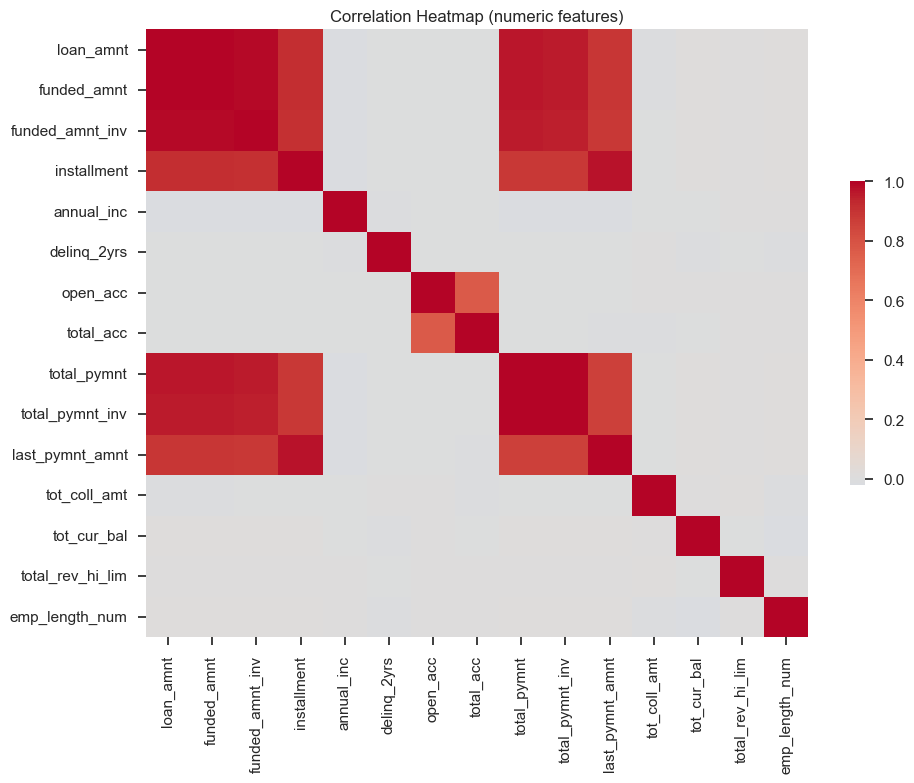

In [16]:

if len(num_cols) > 1:
    corr = df.select_dtypes(include=[np.number]).corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, cmap='coolwarm', center=0, cbar_kws={'shrink':.5})
    plt.title('Correlation Heatmap (numeric features)')
    plt.tight_layout()
    plt.savefig(os.path.join(PLOT_DIR, 'corr_heatmap.png'), dpi=150)
    plt.show()




- Missing values in columns with strong logical correlations were filled using each other.  
  (e.g., **total_pymnt_inv** ↔ **total_pymnt**, **funded_amnt_inv** ↔ **funded_amnt**, **installment** ↔ **last_pymnt_amnt**)


In [17]:
# Hedef ile korelasyon (sayısal)
df['default'] = pd.to_numeric(df['default'], errors='coerce')
if 'default' in df.columns and set(df['default'].dropna().unique()).issubset({0,1}):
    corr_target = df.select_dtypes(include=[np.number]).corrwith(df['default']).sort_values(key=lambda s: s.abs(), ascending=False)
    print('Hedef ile en güçlü 10 doğrusal ilişki:')
    display(corr_target.head(10))

Hedef ile en güçlü 10 doğrusal ilişki:


default            1.000000
annual_inc         0.018343
funded_amnt       -0.010699
total_pymnt_inv   -0.009968
funded_amnt_inv   -0.009636
last_pymnt_amnt   -0.009223
installment       -0.009030
loan_amnt         -0.008716
total_pymnt       -0.008002
tot_cur_bal       -0.007252
dtype: float64

In [18]:
df['default'] = df['default'].astype(object)

## Missing Values

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                15000 non-null  object 
 1   member_id         15000 non-null  object 
 2   loan_amnt         14956 non-null  float64
 3   funded_amnt       14860 non-null  float64
 4   funded_amnt_inv   14844 non-null  float64
 5   term              15000 non-null  object 
 6   installment       14991 non-null  float64
 7   emp_title         14992 non-null  object 
 8   emp_length        15000 non-null  object 
 9   annual_inc        14762 non-null  float64
 10  delinq_2yrs       14985 non-null  float64
 11  open_acc          14986 non-null  float64
 12  total_acc         14970 non-null  float64
 13  total_pymnt       14788 non-null  float64
 14  total_pymnt_inv   14850 non-null  float64
 15  last_pymnt_amnt   14926 non-null  float64
 16  tot_coll_amt      14978 non-null  float6

### INITIAL MISSING VALUE SUMMARY ###

                  missing_count  missing_pct
annual_inc                  238         1.59
delinq_2yrs                  15         0.10
emp_title                     8         0.05
funded_amnt                 140         0.93
funded_amnt_inv             156         1.04
installment                   9         0.06
last_pymnt_amnt              74         0.49
loan_amnt                    44         0.29
open_acc                     14         0.09
tot_coll_amt                 22         0.15
tot_cur_bal                 170         1.13
total_acc                    30         0.20
total_pymnt                 212         1.41
total_pymnt_inv             150         1.00
total_rev_hi_lim             55         0.37




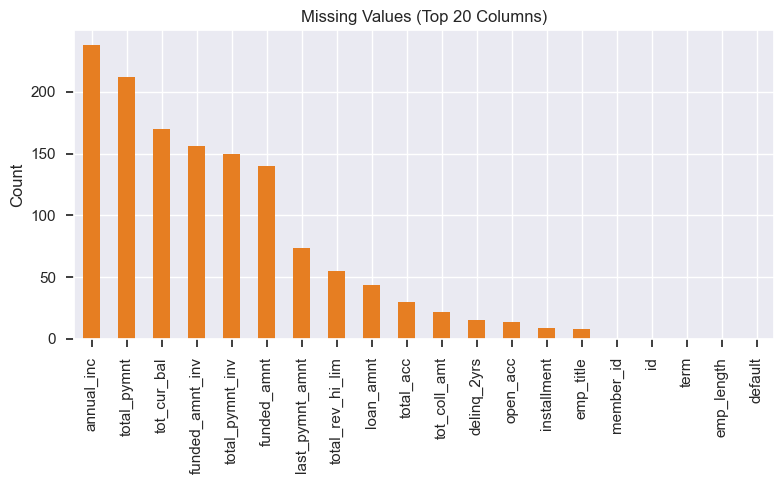

### CORRELATION CHECKS ###
Corelation between'total_pymnt_inv' and 'total_pymnt' : 0.9981
Corelation between'funded_amnt_inv' and 'funded_amnt' : 0.9912
Corelation between'installment' and 'last_pymnt_amnt' : 0.9750


### IMPUTATION IN PROGRESS ###
Imputation completed.

### FINAL MISSING VALUE SUMMARY ###
                  missing_count  missing_pct
annual_inc                    8         0.05
delinq_2yrs                  15         0.10
emp_title                     8         0.05
funded_amnt_inv               9         0.06
last_pymnt_amnt              74         0.49
loan_amnt                    44         0.29
open_acc                     14         0.09
tot_coll_amt                 22         0.15
tot_cur_bal                 170         1.13
total_acc                    30         0.20
total_pymnt_inv               7         0.05
total_rev_hi_lim             55         0.37

### ALL REMAINING NA VALUES REMOVED ###



In [20]:
df = clean_missing_values(df,num_cols)


- Missing values in columns with strong logical correlations were filled using each other.  
  (e.g., **total_pymnt_inv** ↔ **total_pymnt**, **funded_amnt_inv** ↔ **funded_amnt**, **installment** ↔ **last_pymnt_amnt**)


## Outliars

In [21]:
df.describe(percentiles=[0.01, 0.05, 0.95, 0.99])

,loan_amnt,funded_amnt_inv,installment,annual_inc,delinq_2yrs,open_acc,total_acc,total_pymnt_inv,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,emp_length_num
count,14584.000000,14584.000000,14584.000000,14584.000000,14584.000000,14584.000000,14584.000000,14584.000000,14584.000000,14584.000000,14584.000000,14584.000000,14584.000000
mean,20455.994652,17959.178072,35.032619,188502.967361,0.195831,9.035998,15.041621,1425.384909,34.967471,148.975110,89943.501303,60401.123149,4.985052
std,11221.433504,9940.730077,20.925186,92783.390186,0.441667,3.006702,3.856844,813.118189,21.368689,147.775063,52043.263150,34003.397488,3.176457
min,1002.000000,788.000000,1.170000,25003.000000,0.000000,0.000000,2.000000,59.250000,1.100000,0.000000,9.000000,1512.000000,0.000000
1%,1388.490000,1220.000000,2.318300,28406.110000,0.000000,3.000000,7.000000,94.641500,2.238300,1.000000,1914.770000,2739.320000,0.000000
5%,2958.300000,2598.150000,4.860000,41721.250000,0.000000,4.000000,9.000000,202.800500,4.771500,7.000000,9060.000000,7462.950000,0.000000
50%,20565.000000,17949.500000,33.430000,189575.500000,0.000000,9.000000,15.000000,1402.160000,33.005000,104.000000,90171.000000,60673.000000,5.000000
95%,38117.850000,33731.850000,72.467000,333426.450000,1.000000,14.000000,22.000000,2805.061000,73.188500,443.000000,170965.950000,113409.500000,10.000000
99%,39566.700000,36623.000000,76.580000,346308.340000,2.000000,17.000000,25.000000,3159.501100,85.411700,672.340000,178195.170000,118708.740000,10.000000
max,39997.000000,39484.000000,77.770000,349971.000000,4.000000,24.000000,32.000000,3497.980000,92.900000,1461.000000,179996.000000,119988.000000,10.000000


### SKEWNESS VALUES ###

loan_amnt: 0.0058
funded_amnt_inv: 0.0501
installment: 0.2924
annual_inc: -0.0184
delinq_2yrs: 2.2601
open_acc: 0.3289
total_acc: 0.2689
total_pymnt_inv: 0.2007
last_pymnt_amnt: 0.4047
tot_coll_amt: 1.9568
tot_cur_bal: 0.0011
total_rev_hi_lim: 0.0010
emp_length_num: -0.0026




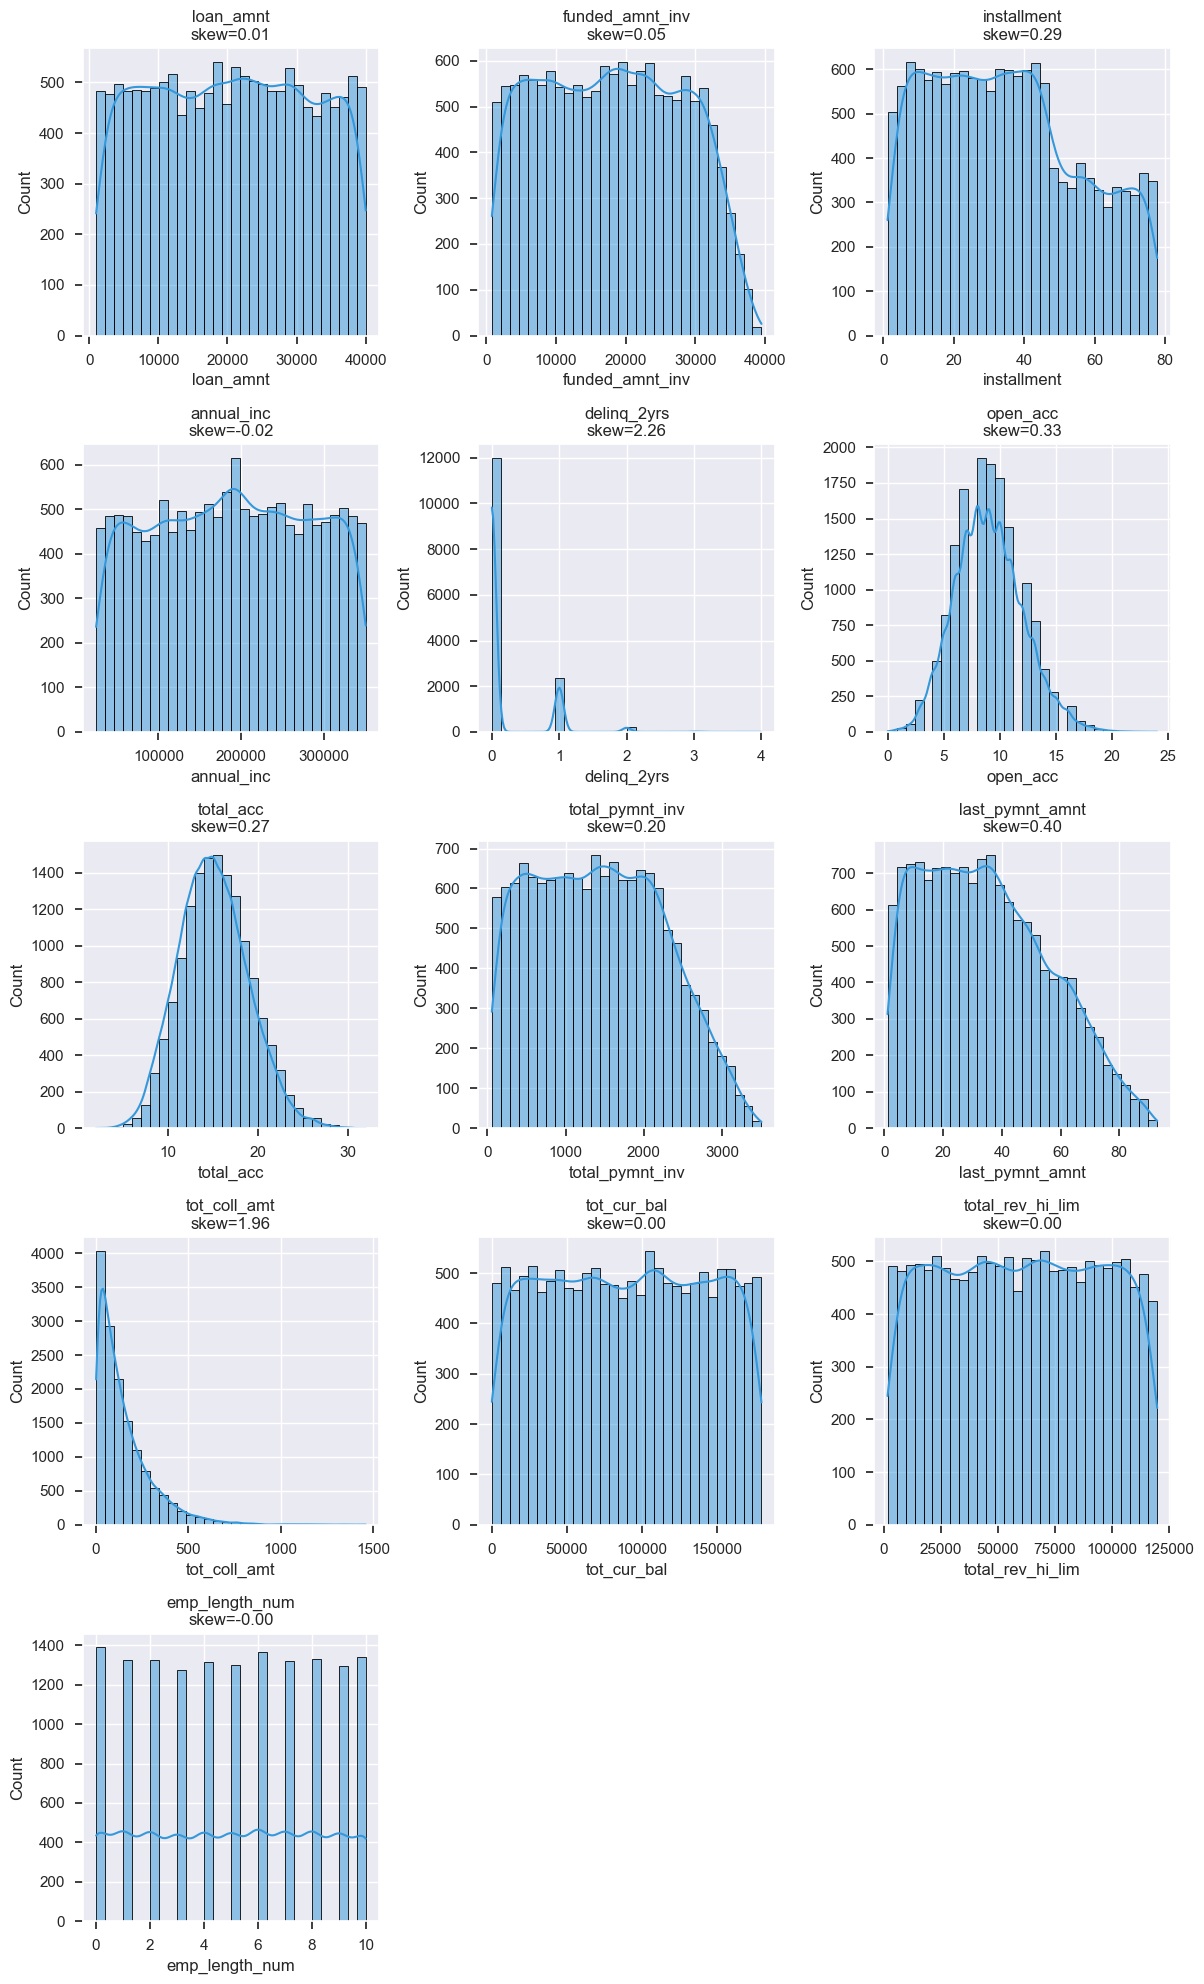

In [22]:
skewness_plot(df)

In [23]:
df=log_transform(df)

Log transform steps completed.



### 🔍 Log-Transformed Features

To normalize skewed distributions, reduce the impact of outliers, and improve model stability, several continuous variables were transformed using the **log1p** function (log(1 + x)).

The following columns were subjected to log transformation:
- **tot_coll_amt**
- **annual_inc**
- **tot_cur_bal**
- **tot_coll_amt** (also overwritten with its log-transformed version)


## Feauture Engineering

In [24]:
print('Leakage olabilecek sütunlar:', leak_cols)

Leakage olabilecek sütunlar: ['total_pymnt', 'total_pymnt_inv', 'last_pymnt_amnt', 'id', 'member_id']


In [25]:
df = create_features(df, leak_cols)

Feature engineering işlemleri tamamlandı.



### **Feature Engineering**
### 1. Risk & Debt Ratios
- **utilization_ratio** → total balance / credit limit  
- **debt_to_income** → total balance / annual income  
- **installment_to_income** → monthly installment / monthly income  
- **income_to_installment** → monthly income / monthly installment  
- **revolver_ratio** → total balance / total number of accounts  

### 2. Loan Structure Features
- **total_installment_amt** → total amount to be paid  
- **interest_rate** → total installments / funded amount  
- **loan_to_income** → loan amount / annual income  
- **loan_to_limit** → loan amount / revolving limit  
- **open_acc_ratio** → open accounts / total accounts  

### 3. Delinquency History
- **ever_delinq** → any delinquency in the last 2 years (True/False)

### 4. Segmentation Features
- **emp_length_segment** → employment length segment  
- **emp_title_segment** → job title segment  

### Notes
- Leakage columns were removed.  
- `term_num` was used temporarily and then dropped.  
- `emp_title` and `emp_length` were removed.


In [26]:
df

,loan_amnt,funded_amnt_inv,term,installment,annual_inc,delinq_2yrs,open_acc,total_acc,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default,emp_length_num,tot_coll_amt_log,annual_inc_log,tot_cur_bal_log,delinq_bucket,utilization_ratio,debt_to_income,installment_to_income,income_to_installment,revolver_ratio,total_installment_amt,interest_rate,loan_to_income,loan_to_limit,open_acc_ratio,ever_delinq,emp_length_segment,emp_title_segment
0,16795.0,15094.0,36,32.66,228362.0,0.0,6.0,12.0,5.257495,30634.0,13996.0,0,9,5.257495,12.338692,10.329898,0,2.188768,0.134147,0.001716,582.675036,2552.833333,1175.76,0.077896,0.073546,1.199986,0.500000,False,senior_exp,tech
1,1860.0,1494.0,60,2.17,273685.0,1.0,14.0,20.0,4.110874,158169.0,97196.0,0,7,4.110874,12.519737,11.971426,1,1.627320,0.577924,0.000095,10510.176651,7908.450000,130.20,0.087149,0.006796,0.019137,0.700000,True,mid_exp,tech
2,39158.0,34683.0,36,76.14,165933.0,0.0,11.0,17.0,4.189655,66504.0,31634.0,0,1,4.189655,12.019345,11.105032,0,2.102295,0.400788,0.005506,181.609535,3912.000000,2741.04,0.079031,0.235987,1.237845,0.647059,False,junior_exp,management
3,12284.0,11096.0,60,14.33,136818.0,0.0,7.0,16.0,3.931826,101207.0,99850.0,0,9,3.931826,11.826414,11.524933,0,1.013590,0.739720,0.001257,795.638521,6325.437500,859.80,0.077487,0.089784,0.123025,0.437500,False,senior_exp,management
4,7265.0,6651.0,60,8.48,114755.0,0.0,13.0,15.0,4.488636,108914.0,68794.0,0,2,4.488636,11.650563,11.598323,0,1.583190,0.949100,0.000887,1127.702437,7260.933333,508.80,0.076500,0.063309,0.105605,0.866667,False,junior_exp,professional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,9594.0,8471.0,36,18.66,195695.0,0.0,9.0,11.0,5.062595,132947.0,50522.0,0,10,5.062595,12.184318,11.797713,0,2.631467,0.679358,0.001144,873.950518,12086.090909,671.76,0.079301,0.049025,0.189897,0.818182,False,senior_exp,tech
14996,14418.0,12611.0,36,28.04,85130.0,0.0,10.0,16.0,2.484907,99115.0,62761.0,0,9,2.484907,11.351947,11.504046,0,1.579245,1.164278,0.003953,253.001664,6194.687500,1009.44,0.080044,0.169365,0.229729,0.625000,False,senior_exp,tech
14997,35854.0,34497.0,36,69.72,311044.0,0.0,12.0,16.0,3.332205,113572.0,77945.0,0,8,3.332205,12.647693,11.640201,0,1.457079,0.365132,0.002690,371.777587,7098.250000,2509.92,0.072758,0.115270,0.459991,0.750000,False,senior_exp,professional
14998,24108.0,19647.0,36,46.88,288933.0,0.0,9.0,13.0,4.110874,136708.0,24824.0,0,10,4.110874,12.573954,11.825610,0,5.507090,0.473148,0.001947,513.603882,10516.000000,1687.68,0.085900,0.083438,0.971157,0.692308,False,senior_exp,tech


In [27]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]


In [28]:
cat_cols

['term',
 'default',
 'delinq_bucket',
 'ever_delinq',
 'emp_length_segment',
 'emp_title_segment']

In [29]:
df.to_csv(WRITE_PATH, index=False)